# Explore here

In [19]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

True

In [20]:
client_id = "33d536d3494b4f71a207772643b75b82"
client_secret = "323a434b603c4722bb860a4d47273155"
Drake_id = "3TVXtAsR1Inumwj472S9r4"
Drake_url = "spotify:artist:3TVXtAsR1Inumwj472S9r4"

#iniciamos sesion en spotify
spotify = spotipy.Spotify(oauth_manager=SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))

#le pedimos que nos de el top de canciones de Drake
results = spotify.artist_top_tracks(Drake_url)

In [21]:
#guardamos la informacion de las canciones en la variable tracks
if results:
    tracks = results['tracks']
print(tracks)

#transformamos la información obtenida en un DataFrame
tabla = pd.DataFrame(tracks)
tabla

#Le pedimos la información de las columnas existentes para elegir por cuales filtrar para ordenar las canciones con el mayor rigor posible
columnas = tabla.columns
print(columnas)

#Cambiamos la duración de milisegundos a minutos y cambiamos el nombre de la etiqueta
tabla['duration_minutes'] = round(tabla['duration_ms'] / 60000, 2)

#Creamos un subconjunto de la tabla principal con nombre, popularidad y duración
popularidad = tabla[['name','popularity', 'duration_minutes']]
print(popularidad)

#Ordenamos las canciones en orden descendiente ya que la más popular tiene un número menos (posición 1 es mejor que posición 100)
mas_populares = popularidad.sort_values('duration_minutes', ascending = False)
print(f"Las canciones más populares son:\n{mas_populares} ")


[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'}, 'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4', 'id': '3TVXtAsR1Inumwj472S9r4', 'name': 'Drake', 'type': 'artist', 'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'D

In [22]:
#Filtramos por el top 3 tal y como nos pide el ejercicio
top_3 = mas_populares.head(3)
print(f"El top 3 de canciones más populares de Drake son:\n{top_3} ")

El top 3 de canciones más populares de Drake son:
           name  popularity  duration_minutes
1      She Will          75              5.10
4  Passionfruit          79              4.98
7      CN TOWER          79              4.03 


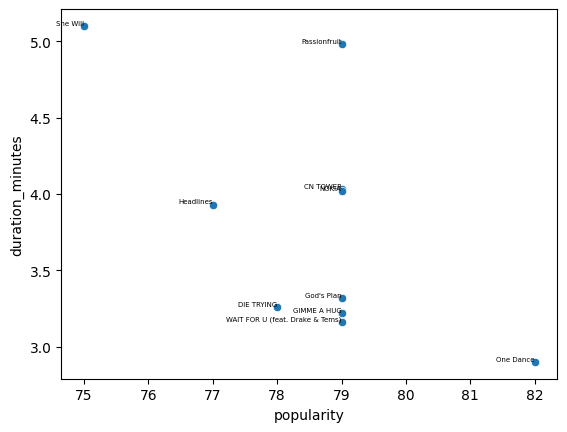

In [25]:
#Hacemos un for para que al hacer el scatter plot aparezcan los nombre de las canciones representados en el gráfico
for i in range(len(mas_populares)):
    plt.text(mas_populares['popularity'].iloc[i], 
             mas_populares['duration_minutes'].iloc[i], 
             mas_populares['name'].iloc[i], 
             fontsize=5, ha='right', va='bottom', color='black')

scatter_plot = sns.scatterplot(data = mas_populares, x = "popularity", y = "duration_minutes")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")
plt.show()

La conclusión es que no hay una relación directa entre la duración de las canciones y su popularidad.